# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df = pd.read_csv('marketing.csv')
df.sample(8)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
1361,1384,1992,Basic,Married,17256.0,1,0,23-11-2013,10,6,...,1,2,8,1,0,0,0,0,0,0
1056,3846,1974,Graduation,Married,42557.0,0,1,29-08-2012,98,192,...,1,4,8,0,0,0,0,0,0,0
564,10232,1963,PhD,Divorced,48799.0,0,1,5/11/2013,9,174,...,2,7,3,0,0,0,0,0,0,0
442,5029,1946,Graduation,Married,18100.0,0,0,6/8/2013,14,3,...,0,3,5,0,0,0,0,0,0,0
1841,6906,1953,Master,Widow,84953.0,0,0,3/6/2013,73,167,...,10,4,2,0,1,1,1,0,0,1
1875,9612,1987,2n Cycle,Single,23830.0,0,0,7/2/2014,3,1,...,0,3,7,0,0,0,0,0,0,0
1253,961,1972,Graduation,Married,74716.0,0,1,12/9/2013,92,133,...,3,5,4,0,0,0,0,0,0,0
1150,1453,1943,PhD,Widow,57513.0,0,0,6/7/2013,59,735,...,3,13,6,0,0,0,0,0,0,0


In [3]:
df.shape

(2240, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

 -  In the provided dataframe there are 27 columns with 2240 entries.
 -  The dataframe consist of 23 columns of integer datatype,3 columns of object datatype and 1 column of float datatype.

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

 -  The Income column in the provided dataframe consist of 1.07% of missing data. 

In [6]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [7]:
df.isnull().sum()/len(df)*100

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64

 -  There are no missing data in the dataframe.

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [8]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


 -  There are no duplicate records in the dataset.

### 5. Drop the columns which you think redundant for the analysis 

In [9]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [10]:
df = df.drop(columns = ['ID', 'Dt_Customer'],axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

   -  Among the available columns of data in the dataset "ID" where 'the customer unique identifier' and "Dt_Customer" where           'the date of customer's enrollment with the company' are not needed for further analysis.
   -  After dropping the unnecessary columns there are 25 columns in the dataset with 22 with integer datatype, 2 with object         and 1 with float  datatype. 

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [12]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [13]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')

In [14]:
df['Marital_Status'].unique()

array(['Single', 'Relationship', 'Divorced', 'Widow', 'Alone', 'Absurd',
       'YOLO'], dtype=object)

In [15]:
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

In [16]:
df['Marital_Status'].unique()

array(['Single', 'Relationship'], dtype=object)

In [17]:
df['Marital_Status'].value_counts()

Relationship    1444
Single           796
Name: Marital_Status, dtype: int64

 -  Here we grouped "Married" and "Together" into "Relationship" category and "Divorced", "Widow", "Alone", "YOLO", "Absurd"         into "Single" category.
 - Now, The Marital_Status columns consist of only "Relationship" and "Single".

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [18]:
columns_series = pd.Series(df.columns)

In [19]:
req_columns = columns_series[columns_series.str.contains('Mnt')].values.tolist()

In [20]:
df['Total_Expenses'] = df[req_columns].sum(axis=1)

In [21]:
df['Total_Expenses']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Expenses, Length: 2240, dtype: int64

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [22]:
columns_series = pd.Series(df.columns)

In [23]:
req_columns = columns_series[columns_series.str.contains('Num')].values.tolist()

In [24]:
df['Num_Total_Purchases'] = df[req_columns].sum(axis=1)

In [25]:
df['Num_Total_Purchases']

0       32
1       11
2       25
3       14
4       24
        ..
2235    23
2236    29
2237    25
2238    26
2239    18
Name: Num_Total_Purchases, Length: 2240, dtype: int64

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [26]:
columns_series = pd.Series(df.columns)

In [27]:
req_columns = columns_series[columns_series.str.contains('home')].values.tolist()

In [28]:
df['Kids'] = df[req_columns].sum(axis=1)

In [29]:
df['Kids']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Kids, Length: 2240, dtype: int64

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [30]:
columns_series = pd.Series(df.columns)

In [31]:
req_columns = columns_series[columns_series.str.contains('AcceptedCmp|Response')].values.tolist()

In [32]:
df['TotalAcceptedCmp'] = df[req_columns].sum(axis=1)

In [33]:
df['TotalAcceptedCmp']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: TotalAcceptedCmp, Length: 2240, dtype: int64

### 11. Drop those columns which we have used above for obtaining new features

In [34]:
df = df.drop(columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                        'Response', 'Kidhome', 'Teenhome',  'NumWebPurchases', 'NumCatalogPurchases', 
                        'NumStorePurchases', 'NumDealsPurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Recency              2240 non-null   int64  
 5   NumWebVisitsMonth    2240 non-null   int64  
 6   Complain             2240 non-null   int64  
 7   Total_Expenses       2240 non-null   int64  
 8   Num_Total_Purchases  2240 non-null   int64  
 9   Kids                 2240 non-null   int64  
 10  TotalAcceptedCmp     2240 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 192.6+ KB


In [39]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1617,32,0,1
1,1954,Graduation,Single,46344.0,38,5,0,27,11,2,0
2,1965,Graduation,Relationship,71613.0,26,4,0,776,25,0,0
3,1984,Graduation,Relationship,26646.0,26,6,0,53,14,1,0
4,1981,PhD,Relationship,58293.0,94,5,0,422,24,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [40]:
df['Age'] = 2023-df['Year_Birth']

In [41]:
df['Age']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2240, dtype: int64

In [42]:
df = df.drop(columns = ['Year_Birth'], axis=1)

In [43]:
df.sample(4)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
1770,PhD,Single,25509.0,15,9,0,101,18,1,1,49
875,Graduation,Relationship,80812.0,95,2,0,1677,20,0,3,70
544,Graduation,Relationship,54058.0,56,3,0,662,23,1,0,47
618,Graduation,Single,54162.0,31,4,0,42,9,2,0,45


In [44]:
df_alt = df.copy()

### 13. Encode the categorical variables in the dataset

In [46]:
en_cat=['Education','Marital_Status']
lbl_encode = LabelEncoder()
for i in en_cat:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [49]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,2,1,58138.0,58,7,0,1617,32,0,1,66
1,2,1,46344.0,38,5,0,27,11,2,0,69
2,2,0,71613.0,26,4,0,776,25,0,0,58
3,2,0,26646.0,26,6,0,53,14,1,0,39
4,4,0,58293.0,94,5,0,422,24,1,0,42


### 14. Standardize the columns, so that values are in a particular range

In [51]:
df1 = df.copy()

In [52]:
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [53]:
scaled_features_df.sample(5)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
1559,1.428354,1.346874,0.716347,-1.350649,-0.130463,-0.097282,0.711163,1.484086,0.065928,-0.501912,-0.600447
1494,-0.350141,-0.742460,-0.658442,1.274024,0.281720,-0.097282,-0.881556,-0.847349,0.065928,-0.501912,-1.768926
54,-0.350141,-0.742460,0.564303,0.272504,-0.954831,-0.097282,0.000335,0.798370,1.396361,-0.501912,-0.767373
1920,-2.128637,1.346874,-0.813722,-1.454255,-0.954831,-0.097282,-0.889860,-1.533065,0.065928,-0.501912,-0.683910
1986,-0.350141,-0.742460,0.194380,-0.141918,0.693904,-0.097282,-0.569324,0.386940,1.396361,-0.501912,-0.767373


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [56]:
cov_matrix = np.cov(scaled_features_df.T)
print('Covariance Matrix :', '\n', cov_matrix)

Covariance Matrix : 
 [[ 1.00044663  0.01375403  0.1200273  -0.01173369 -0.04029882 -0.05056252
   0.09209518  0.08559678  0.05321304  0.06327892  0.17146685]
 [ 0.01375403  1.00044663 -0.00463847  0.00450972 -0.00344176  0.00520466
   0.01775232 -0.00820874 -0.03917598  0.06004206  0.0042384 ]
 [ 0.1200273  -0.00463847  1.00044663 -0.00394826 -0.55006966 -0.02723528
   0.66500337  0.41026768 -0.29084155  0.28717443  0.16101378]
 [-0.01173369  0.00450972 -0.00394826  1.00044663 -0.02145427  0.01323699
   0.02044173 -0.00109311  0.01806145 -0.08900203  0.01987996]
 [-0.04029882 -0.00344176 -0.55006966 -0.02145427  1.00044663  0.01977734
  -0.50044131  0.00399896  0.41860616 -0.12836726 -0.12119336]
 [-0.05056252  0.00520466 -0.02723528  0.01323699  0.01977734  1.00044663
  -0.03707503 -0.01509537  0.03108014 -0.01761676  0.030141  ]
 [ 0.09209518  0.01775232  0.66500337  0.02044173 -0.50044131 -0.03707503
   1.00044663  0.62743227 -0.49911047  0.4564099   0.11135611]
 [ 0.08559678 -0.00

In [59]:
eig_val, eig_vec = np.linalg.eig(cov_matrix)
print('Eigen Values :', '\n', eig_val)
print('\n')
print('Eigen Vectors :', '\n', eig_vec)

Eigen Values : 
 [2.94916103 0.15239838 0.30658704 1.2819855  0.61251936 0.71334677
 0.83784392 1.11708736 1.03161176 1.01457176 0.98780004]


Eigen Vectors : 
 [[-8.82047278e-02 -1.30634986e-02  1.57858680e-02  5.24425413e-01
   1.23210378e-01 -2.34693262e-01 -6.83925692e-01 -3.28089721e-02
  -4.10814188e-01  8.97251370e-02  2.94390923e-02]
 [-2.01439195e-02  1.32928428e-04  1.19618613e-03 -5.74565494e-02
  -4.73582182e-02 -1.55386484e-01  2.14760918e-01  1.36907639e-01
  -1.87590729e-01  8.91975174e-01 -2.72447815e-01]
 [-4.71739235e-01 -5.72010363e-02 -7.05325357e-01  8.14421897e-02
  -4.50144225e-01 -1.85291799e-01  9.30300884e-02 -1.40495710e-01
   8.81241225e-04 -4.55948431e-02  5.13542966e-02]
 [ 8.27515654e-03 -3.40506504e-02 -2.84079563e-02  5.50698072e-02
  -2.48284048e-02  1.92240949e-01 -2.66514545e-01 -4.61848697e-01
   3.86943039e-01  3.16385642e-02 -7.22702712e-01]
 [ 3.73206802e-01  3.19606696e-01 -5.43798758e-01  2.14823707e-01
   2.51019747e-01  5.13982203e-02 -3.7533

In [60]:
total = sum(eig_val)
var_exp = [ (i/total)*100  for i in sorted(eig_val,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [26.798585806481444, 11.649210766953534, 10.150805980501024, 9.374102000026491, 9.21926204338161, 8.9759914747235, 7.613362533349924, 6.482075563117803, 5.565871911242888, 2.785910613314311, 1.3848213069074768]
Cummulative Variance Explained:  [ 26.79858581  38.44779657  48.59860255  57.97270455  67.1919666
  76.16795807  83.78132061  90.26339617  95.82926808  98.61517869
 100.        ]


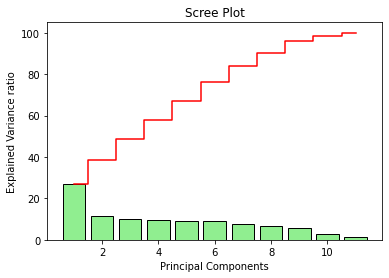

In [63]:
plt.bar(range(1,len(var_exp)+1),var_exp, align='center', color='lightgreen', edgecolor='black', label='Explained Variance')
plt.step(range(1,len(var_exp)+1),cum_var_exp, where='mid', color='red',label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance ratio')
plt.title('Scree Plot')
plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()                   

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.033950,0.419145,-1.036579,0.689688,1.071492,-0.994511,-0.891449,-0.223936
1,-1.506806,0.652727,0.712385,-0.819790,1.393512,0.382629,-1.217533,-0.516112
2,1.221206,-0.371544,0.249296,-0.055375,-0.836466,0.769368,-0.678288,0.537000
3,-1.718520,-1.168547,-0.344538,-0.370788,-0.794967,0.602906,0.340539,0.362462
4,-0.007828,0.507311,0.678052,0.253114,-0.774035,-1.178681,1.663395,0.946488


In [68]:
from sklearn.cluster import KMeans
cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

In [69]:
cluster_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors':cluster_errors})

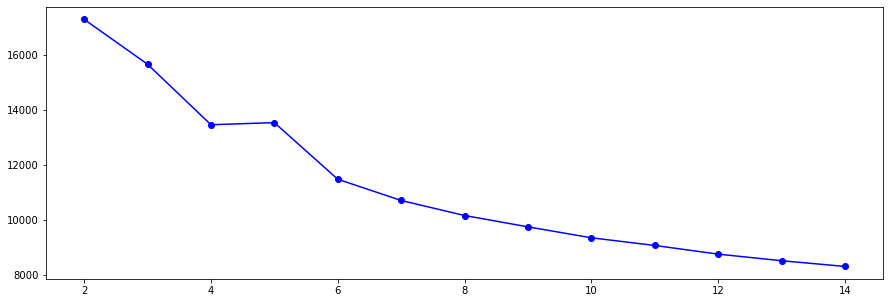

In [70]:
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

In [71]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [72]:
label = pd.DataFrame(kmeans.labels_,columns=['Label'])

In [73]:
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,2.033950,0.419145,-1.036579,0.689688,1.071492,-0.994511,-0.891449,-0.223936,0
1,-1.506806,0.652727,0.712385,-0.819790,1.393512,0.382629,-1.217533,-0.516112,2
2,1.221206,-0.371544,0.249296,-0.055375,-0.836466,0.769368,-0.678288,0.537000,1
3,-1.718520,-1.168547,-0.344538,-0.370788,-0.794967,0.602906,0.340539,0.362462,2
4,-0.007828,0.507311,0.678052,0.253114,-0.774035,-1.178681,1.663395,0.946488,0


In [74]:
kmeans_df['Label'].value_counts()

2    1071
0     658
1     511
Name: Label, dtype: int64

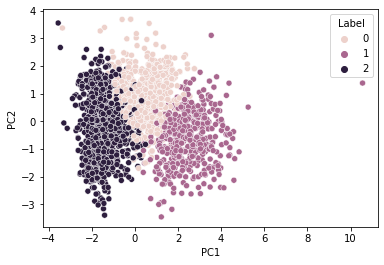

In [75]:
sns.scatterplot(kmeans_df['PC1'],kmeans_df['PC2'],hue='Label',data=kmeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

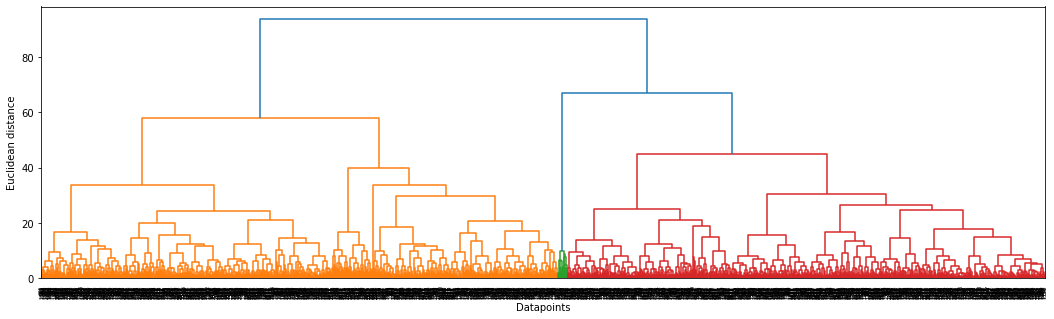

In [76]:
plt.figure(figsize=[18,5])
merg = linkage(scaled_features,method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [77]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [78]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df, labels))

2 0.17809056350781835
3 0.18598580330268294
4 0.1439206155014977
5 0.12590195145455974
6 0.13001144184385635
7 0.12584736971415103
8 0.1273098712999348
9 0.09974850685968197
10 0.10339759657355756
11 0.1049197541711507
12 0.10663704314542533
13 0.10707069474726147
14 0.10584568925200426


In [79]:
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)

In [80]:
df_label1 = pd.DataFrame(hie_cluster_model.labels_, columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,0


In [81]:
df_hier = df.join(df_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Labels
0,2,1,58138.0,58,7,0,1617,32,0,1,66,0
1,2,1,46344.0,38,5,0,27,11,2,0,69,1
2,2,0,71613.0,26,4,0,776,25,0,0,58,0
3,2,0,26646.0,26,6,0,53,14,1,0,39,1
4,4,0,58293.0,94,5,0,422,24,1,0,42,0


### Visualization and Interpretation of results

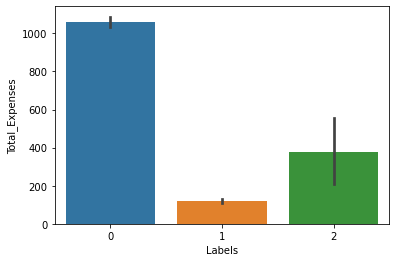

In [82]:
sns.barplot(df_hier['Labels'], df_hier['Total_Expenses'])
plt.show()

 -  The Total_Expense for cluster 0 is much higher than cluster 1 and 2.

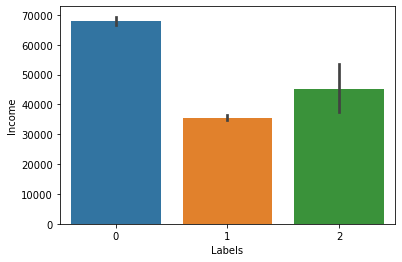

In [83]:
sns.barplot(df_hier['Labels'], df_hier['Income'])
plt.show()

 -  The Income for cluster 0 is higher than cluster 1 and 2.

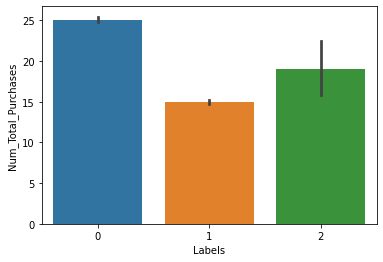

In [84]:
sns.barplot(df_hier['Labels'], df_hier['Num_Total_Purchases'])
plt.show()

 -  The cluster 0 have high number of purchases than cluster 1 and cluster 2.

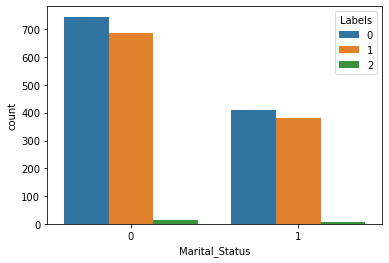

In [85]:
sns.countplot(df_hier['Marital_Status'], hue='Labels',data=df_hier)
plt.show()

 - Most number of Married customers are in clusters 0 and 1
 - The Marital status data of customers in Cluster 2 is mostly missing, hence it has less people in both married and unmarried      groups.


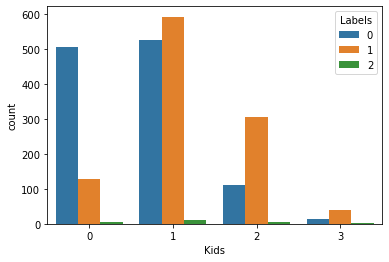

In [86]:
sns.countplot(df_hier['Kids'], hue='Labels',data=df_hier)
plt.show()

 - Most number of customers in cluster 0 and 1 have only 1 child.
 - Number of customers having 3 kids are less.

-----
## Happy Learning
-----